## Visualize model training


#### Import dependencies

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy



####  Fix random seed for reproducibility

In [4]:
seed = 7
numpy.random.seed(seed)

#### Load data

In [8]:
dataset = numpy.loadtxt("pima.csv", delimiter=",")

#### View data

In [14]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

#### divide data into training and test subset

In [15]:
X = dataset[:,0:8]

In [25]:
Y = dataset[:,8]

In [27]:
print(X.shape)
print(Y.shape)


(768, 8)
(768,)


#### create model

In [29]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

#### compile model

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the model

In [31]:
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

#### Summary accuracy history

In [32]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


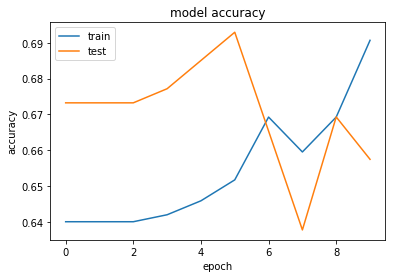

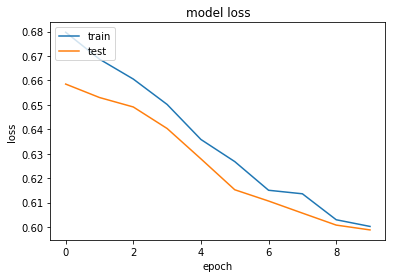

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()